<a href="https://colab.research.google.com/github/anizxx/ml_class/blob/main/Smart%20Garbage%20Overflow%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
import numpy as np
import pandas as pd

np.random.seed(42)

# Number of samples
n = 5000

# Generate features
ultrasonic_distance = np.random.uniform(5, 50, n)              # cm
weight = np.random.uniform(1, 30, n)                           # kg
temperature = np.random.uniform(20, 45, n)                     # °C
humidity = np.random.uniform(30, 90, n)                        # %
gas_level = np.random.uniform(100, 800, n)                     # ppm

# Fill level decreases when distance increases
fill_level = 100 - (ultrasonic_distance * 2)

# Add noise
fill_level = fill_level + np.random.normal(0, 5, n)
fill_level = np.clip(fill_level, 0, 100)

# Overflow if fill level > 80%
overflow = (fill_level > 80).astype(int)

# Create DataFrame
df = pd.DataFrame({
    "ultrasonic_distance": ultrasonic_distance,
    "weight": weight,
    "temperature": temperature,
    "humidity": humidity,
    "gas_level": gas_level,
    "fill_level": fill_level,
    "overflow": overflow
})

df.head()


,ultrasonic_distance,weight,temperature,humidity,gas_level,fill_level,overflow
0,21.854305,12.415430,29.341020,59.980215,610.998818,58.379796,0
1,47.782144,14.729634,28.322802,74.804806,229.158397,4.902538,0
2,37.939727,25.781874,24.403848,63.760007,342.647786,20.823411,0
3,31.939632,10.860127,35.181667,34.998155,564.296446,36.140743,0
4,12.020839,26.219841,31.915604,41.134814,437.462541,72.386390,0


In [4]:
df.describe()


,ultrasonic_distance,weight,temperature,humidity,gas_level,fill_level,overflow
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,27.357440,15.253127,32.534376,60.461082,456.143980,45.280756,0.116200
std,13.033514,8.282879,7.269245,17.268373,202.118887,26.469552,0.320497
min,5.000524,1.001532,20.003944,30.015147,100.033687,0.000000,0.000000
25%,15.973826,8.167231,26.179183,45.763757,281.227054,22.674211,0.000000
50%,27.500388,15.093176,32.404928,60.746978,459.338267,45.041679,0.000000
75%,38.664539,22.267776,39.015475,75.066334,630.387643,67.996016,0.000000
max,49.987295,29.985651,44.995129,89.995490,799.930684,100.000000,1.000000


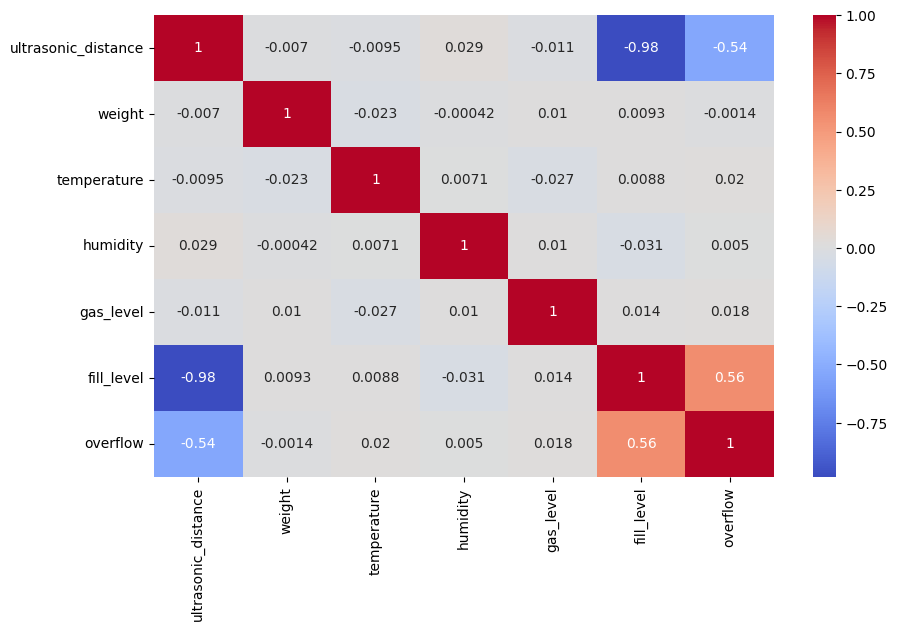

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


In [7]:
X = df.drop(["overflow", "fill_level"], axis=1)
y = df["overflow"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


Accuracy: 0.951

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       894
           1       0.74      0.83      0.78       106

    accuracy                           0.95      1000
   macro avg       0.86      0.90      0.88      1000
weighted avg       0.95      0.95      0.95      1000



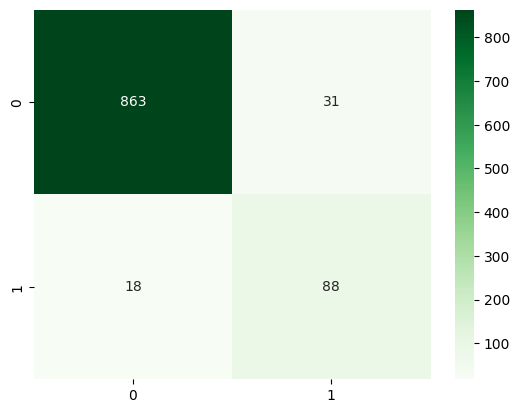

In [9]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.show()


In [10]:
sample = np.array([[20, 15, 30, 60, 400]])  # example readings
sample_df = pd.DataFrame(sample, columns=X.columns)

prediction = model.predict(sample_df)
print("Overflow soon?" , "YES" if prediction[0]==1 else "NO")


Overflow soon? NO
